In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)

In [4]:
data = pd.read_csv(r'C:\Users\USER\Documents\Renju\Ineuron\Projects\StrokePrediction\healthcare-dataset-stroke-data.csv')

5110 rows , pretty good for machine learning

In [5]:
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory data analysis 

In [6]:
data.shape

(5110, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Null values in BMI --

### Lets fill null values

In [9]:
data['bmi'].value_counts()


28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [10]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

Lets fill with the mean value for all those 201 missing values 

In [11]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [12]:
data['bmi'].isnull().sum()

0

We dont need to work more on features !!

In [13]:
data.drop('id',axis = 1,inplace=True)

### Outlier Removal

<Figure size 1440x2160 with 0 Axes>

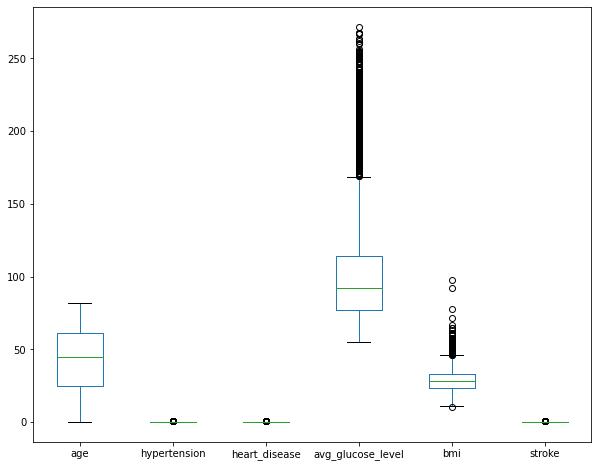

In [14]:
plt.figure(figsize=(20,30))
data.plot(kind="box")
plt.show()

In [15]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [16]:
data[data['avg_glucose_level'] > 114]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


#### Should we remove the outliers , in avg_glucose_level , bmi ... Probably these could be the reason for the strokes!!

#### Before normalization , we need to do encoding

### Encoding, There are atleast 8 techniques

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [18]:
gender = enc.fit_transform(data['gender'])

In [19]:
smoking_status = enc.fit_transform(data['smoking_status'])

In [20]:
work_type = enc.fit_transform(data['work_type'])

In [21]:
Residence_type = enc.fit_transform(data['Residence_type'])

In [22]:
ever_married = enc.fit_transform(data['ever_married'])

In [23]:
ever_married

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
data['work_type'] = work_type

In [25]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,2,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,3,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,2,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,2,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,3,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,2,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,3,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,3,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,2,Rural,166.29,25.600000,formerly smoked,0


In [26]:
data['gender'] = gender

In [27]:
data['smoking_status']  =smoking_status

In [28]:
data['Residence_type'] = Residence_type

In [29]:
data['ever_married'] = ever_married

## Data partitioning (splitting)

In [30]:
X = data.drop('stroke',axis=1)

In [31]:
Y = data['stroke']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [33]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [49]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [74]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [75]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

### Normalization

In [34]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [35]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test) ### Why are we doing only transform here ...Read about data leakage

In [36]:
import pickle
import os
#root = os.chdir(r'C:\Users\USER\Documents\Renju\Ineuron\Projects\StrokePrediction/')
#print(root)

In [37]:
scaler_path = os.path.join('C:/Users/USER/Documents/Renju/Ineuron/Projects/StrokePrediction/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

## Training

### Decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [39]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [40]:
dt.fit(X_train_std,Y_train)


DecisionTreeClassifier()

In [41]:
dt.feature_importances_

array([0.04105287, 0.15738296, 0.02919811, 0.02496814, 0.00296279,
       0.04994416, 0.04296804, 0.3525709 , 0.2303843 , 0.06856774])

In [42]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [43]:
### BMI,avg_glucose_level and age is most important features

In [44]:
y_pred_dt = dt.predict(X_test_std)

In [45]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_dt = accuracy_score(Y_test,y_pred_dt)

### Logistic Regression 

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [52]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [53]:
y_pred_lr = lr.predict(X_test_std)

In [54]:
accuracy_lr = accuracy_score(Y_test,y_pred_lr)

In [55]:
accuracy_lr

0.9471624266144814

### KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [58]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [59]:
y_pred_knn = knn.predict(X_test_std)

In [60]:
accuracy_knn = accuracy_score(Y_test,y_pred_lr)

In [61]:
accuracy_knn

0.9471624266144814

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [63]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [64]:
y_pred_rf = rf.predict(X_test)

In [65]:
accuracy_rf = accuracy_score(Y_test,y_pred_rf)
accuracy_rf

0.9461839530332681

### For Decision tree and Random Forest , you dont need to use the scaled data , they can work on the data as it is

### SVM

In [66]:
from sklearn.svm import SVC

In [67]:
sv = SVC()

In [68]:
sv.fit(X_train_std,Y_train)

SVC()

In [69]:
y_pred_svm = sv.predict(X_test_std)

In [70]:
accuracy_svm = accuracy_score(Y_test,y_pred_svm)

In [71]:
accuracy_svm

0.9471624266144814

In [72]:
accuracy_lr

0.9471624266144814

Text(0, 0.5, 'Accuracy')

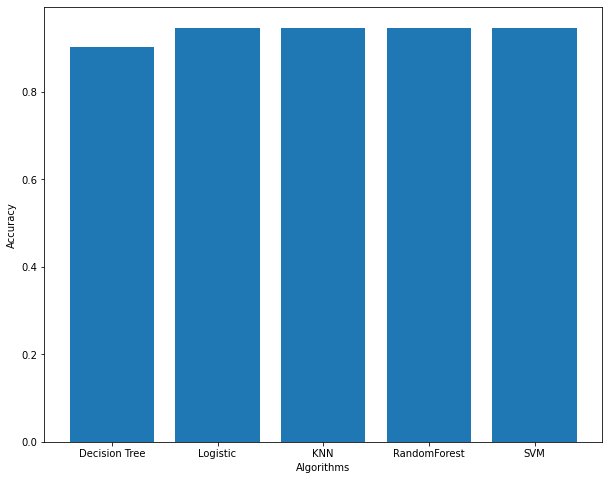

In [73]:
plt.bar(['Decision Tree','Logistic','KNN','RandomForest','SVM'],[accuracy_dt,accuracy_lr,accuracy_knn,accuracy_rf,accuracy_svm])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")

In [ ]:
import joblib

In [ ]:
model_path = os.path.join('C:/Users/USER/Documents/Renju/Ineuron/Projects/StrokePrediction/','models/decisionTree.sav') 
model_path
joblib.dump(dt,model_path)

In [77]:
import time
print("Hello World")
time.sleep(5)
print("Renju ")

Hello World
Renju 
